<a href="https://colab.research.google.com/github/AraujoFernando/Portifolio/blob/master/O_Brasil_e_a_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="100%" src="https://abcreporter.com.br/wp-content/uploads/2020/03/Coronavirus-AbcReporter.jpg"></center>

# Panorama do COVID-19 no Brasil

A COVID-19 é uma doença causada pelo coronavírus **SARS-CoV-2**, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. De acordo com a Organização Mundial de Saúde (OMS), a maioria dos pacientes com COVID-19 (cerca de 80%) podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória e desses casos aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório).

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados utilizados análise foram retirados do repositório [Own World in Data](https://github.com/owid), que atualiza diariamente os dados referentes ao Covid-19  

Não é possível afirmar que os dados sejam 100% fidedignos a realidade, pois, existe um grande vale entre coleta e disponibilização, tanto nas esferas, municipal, estadual e federal.

### Dicionário de Variáveis
* iso_code - códigos de países com três letras
* continent - Continente em que está localizado
* location - Localização geográfica
* date - Data de observação
* total_cases - Total confirmado de casos
* new_cases - Novos casos confirmados
* total_deaths - Total de mortes atribuidas ao covid-19
* new_deaths - Novas mortes atribuidas ao covid-19
* total_cases_per_million - Total de casos por 1.000.000 de habitantes
* new_cases_per_million - Total de novos casos por 1.000.000 de habitantes
* total_deaths_per_million - Total de mortes por 1.000.000 de habitantes
* new_deaths_per_million - Total de novas mortes por 1.000.000 de habitantes
* total_tests - total de testes
* new_tests - Novos testes
* total_tests_per_thousand - Total de testes por 1000 habitantes
* new_tests_per_thousand - Total de novos teste por por 1000 habitantes
* new_tests_smoothed - New tests for COVID-19 (7-day smoothed)
* new_tests_smoothed_per_thousand - New tests for COVID-19 (7-day smoothed) por 1000 habitantes
* tests_units - Unidades usadas pelo local para relatar seus dados de teste
* stringency_index - Índice de Estresse da Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionada para um valor de 0 a 100 (100 = resposta mais estrita)
* population - População em 2020
* population_density - Número de pessoas divididas por área terrestre, medida em quilômetros quadrados, no ano mais recente disponível
* median_age - Idade média da população, projeção da ONU para 2020
* aged_65_older - Proporção da população com 65 anos ou mais, ano mais recente disponível
* aged_70_older - Percentagem da população com 70 anos ou mais em 2015
* gdp_per_capita - Produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
* extreme_poverty - Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
* cvd_death_rate - Taxa de mortalidade por doenças cardiovasculares em 2017
* diabetes_prevalence - Prevalência de diabetes - (% da população entre 20 e 79 anos) em 2017
* female_smokers -Percentagem de mulheres que fumam, último ano disponível
* male_smokers - Percentagem de homens que fumam, último ano disponível
* handwashing_facilities - Percentagem da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível
* hospital_beds_per_thousand - Camas de hospital por 1.000 pessoas, último ano disponível desde 2010
* life_expectancy -  Expectativa de vida no nascimento em 2019



In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pywaffle -q


sns.set(style="darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataFrame
path = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df = pd.DataFrame(path)

## Análise Exploratória dos Dados
Vamos fazer uma análise exploratória para conhecer o nosso DataFrame.

### Análise Exploratória Inicial

* *Visualizar as 5 primeiras entradas*
    * `df.head()`
* *Qual o tamanho do seu DataFrame*
    * `df.shape`
* *Extrair e imprimir os nomes das colunas*
    * `df.columns`
* *Quais os tipos das variáveis*
    * `df.dtypes`
* *Identifique a porcentagem de valores ausentes das colunas*
    * `df.isnull().sum() / df.shape[0]` ou
    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)` *para ordem decrescente.*
* *Transforme a coluna `date` no formato `datetime`*
    * `df.date = pd.to_datetime(df.date)`
* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


###Dimensões
Precisamos saber com o que estamos lidando. Vamos conhecer as dimenssões do nosso DataFrame.

Vamos verificar qual a atualização mais recente verificando coluna `date`.

In [ ]:
# verificando a ultima atualização do dataset
df.loc[df.date == df.date.max()].tail(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
30799,OWID_WRL,NaN,World,2020-07-17,13788300.0,256314.0,589688.0,5793.0,1768.91,32.883,75.651,0.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


In [ ]:
# verifiando o tamanho do dataframe
print(f'Dimenssões:\nEntradas: {df.shape[0]}\nVariáveis: {df.shape[1]}')

# visualizando as 5 primeiras entradas
df.sample(5)


Dimenssões:
Entradas: 30864
Variáveis: 34


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
22396,POL,Europe,Poland,2020-05-25,21326.0,395.0,996.0,3.0,563.485,10.437,26.317,0.079,779576.0,12135.0,20.598,0.321,20504.0,0.542,samples tested,79.63,37846605.0,124.027,41.8,16.763,10.202,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73
7511,COD,Africa,Democratic Republic of Congo,2020-04-26,442.0,26.0,28.0,0.0,4.935,0.290,0.313,0.000,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,80.56,89561404.0,35.879,17.0,3.020,1.745,808.133,77.1,318.949,6.10,NaN,NaN,4.472,NaN,60.68
2297,BHR,Asia,Bahrain,2020-05-28,9633.0,267.0,15.0,1.0,5661.199,156.913,8.815,0.588,297873.0,6746.0,175.056,3.965,5067.0,2.978,units unclear,75.00,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29
11584,GUM,Oceania,Guam,2020-04-10,128.0,3.0,4.0,0.0,758.370,17.774,23.699,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,168783.0,304.128,31.4,9.551,5.493,NaN,NaN,310.496,21.52,NaN,NaN,NaN,NaN,80.07
7454,CZE,Europe,Czech Republic,2020-07-05,12440.0,121.0,351.0,-1.0,1161.642,11.299,32.776,-0.093,573667.0,1524.0,53.569,0.142,3782.0,0.353,tests performed,34.72,10708982.0,137.176,43.3,19.027,11.580,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38


In [ ]:
# verificando os tipos das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Vamos verificar o percentual de valores nulos. É importante nos atentarmos para o que é realmente valor ausente e o motivo de estarem faltando.

In [ ]:
# identificando percentual valores nulos
round(df.isnull().sum() / df.shape[0], 2).sort_values(ascending=False)

new_tests_per_thousand             0.70
new_tests                          0.70
total_tests_per_thousand           0.69
total_tests                        0.69
new_tests_smoothed_per_thousand    0.67
new_tests_smoothed                 0.67
tests_units                        0.64
handwashing_facilities             0.59
extreme_poverty                    0.40
male_smokers                       0.29
female_smokers                     0.28
stringency_index                   0.19
hospital_beds_per_thousand         0.18
gdp_per_capita                     0.11
aged_65_older                      0.11
cvd_death_rate                     0.10
median_age                         0.10
aged_70_older                      0.10
diabetes_prevalence                0.07
population_density                 0.04
continent                          0.01
new_deaths                         0.01
total_cases                        0.01
new_cases                          0.01
total_deaths                       0.01


Antes de Prosseguirmos, vamos transformar a coluna `date` para o formato datetime para um melhor desenvolvimento da nossa análise.

In [ ]:
# transformando a coluna date em datetime
df.date = pd.to_datetime(df.date)

Vamos ver onde quais os paises com os maiores números de casos confirmados e de mortes relacionadas ao covid-19

In [ ]:
#visualizando maior número de casos por país
df.loc[df.date == df.date.max()].sort_values(by='total_cases', ascending=False).head(6)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
30799,OWID_WRL,NaN,World,2020-07-17,13788300.0,256314.0,589688.0,5793.0,1768.910,32.883,75.651,0.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
29364,USA,North America,United States,2020-07-17,3576221.0,76930.0,138358.0,939.0,10804.207,232.415,417.997,2.837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4160,BRA,South America,Brazil,2020-07-17,2012151.0,45403.0,76688.0,1322.0,9466.299,213.601,360.784,6.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
13091,IND,Asia,India,2020-07-17,1003832.0,34956.0,25602.0,687.0,727.412,25.330,18.552,0.498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
23294,RUS,Europe,Russia,2020-07-17,752797.0,6428.0,11937.0,167.0,5158.459,44.047,81.797,1.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
22118,PER,South America,Peru,2020-07-17,341586.0,3862.0,12615.0,198.0,10359.929,117.130,382.599,6.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.800,NaN,NaN,1.600,76.74


Podemos verificar que os paises que lideram o ranking de casos confirmados são:

* Estados Unidos - 3.576.221
* Brasil - 2.012.151
* Índia - 1.003.832



In [ ]:
# visualizando o maior número de mortes por país    
df.loc[df.date == df.date.max()].sort_values(by='total_deaths', ascending=False).head(6)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
30799,OWID_WRL,NaN,World,2020-07-17,13788300.0,256314.0,589688.0,5793.0,1768.910,32.883,75.651,0.743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
29364,USA,North America,United States,2020-07-17,3576221.0,76930.0,138358.0,939.0,10804.207,232.415,417.997,2.837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4160,BRA,South America,Brazil,2020-07-17,2012151.0,45403.0,76688.0,1322.0,9466.299,213.601,360.784,6.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
29164,GBR,Europe,United Kingdom,2020-07-17,292552.0,641.0,45119.0,66.0,4309.460,9.442,664.629,0.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
18421,MEX,North America,Mexico,2020-07-17,324041.0,6406.0,37574.0,668.0,2513.256,49.685,291.423,5.181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.900,21.400,87.847,1.380,75.05
14399,ITA,Europe,Italy,2020-07-17,243736.0,230.0,35017.0,20.0,4031.238,3.804,579.159,0.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51


Os lideres em números de morte são:

* Estados Unidos - 138.358
* Brasil - 76.930
* Reino Unido - 45.119

Para melhor visualizarmos vamos plotar um gráfico.

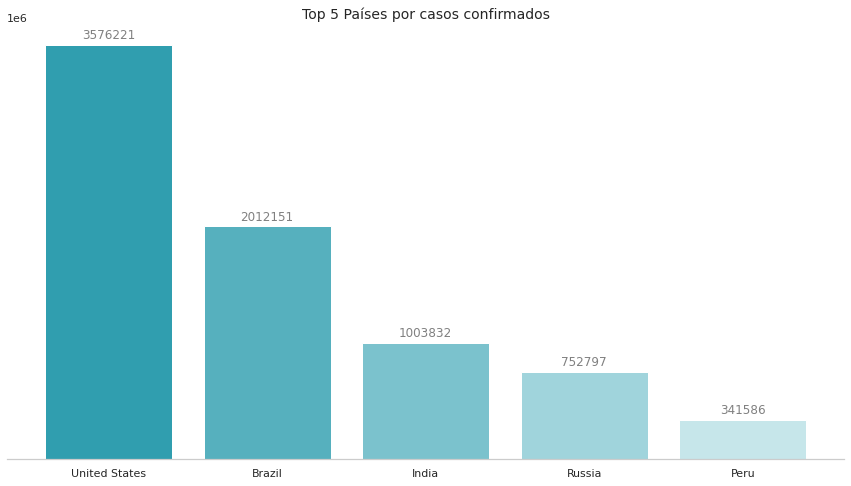

In [ ]:
# coletando os dados para o gráfico
top_5_total_cases = df.loc[df.date == df.date.max(), ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:6]

# plotando gráfico de casos confirmados
fig, ax = plt.subplots(figsize=(15, 8))
rects = ax.bar('location', 'total_cases', data=top_5_total_cases, color= sns.light_palette((210, 90, 60), input="husl", reverse=True))

top5 = list(top_5_total_cases.iloc[:5,1])
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True, direction='out')

for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='gray', fontsize=12)

sns.set_style('whitegrid')
sns.despine(left=True)
plt.grid(False)
plt.title('Top 5 Países por casos confirmados', fontsize=14)
plt.show()

### Top 5 países por Mortes

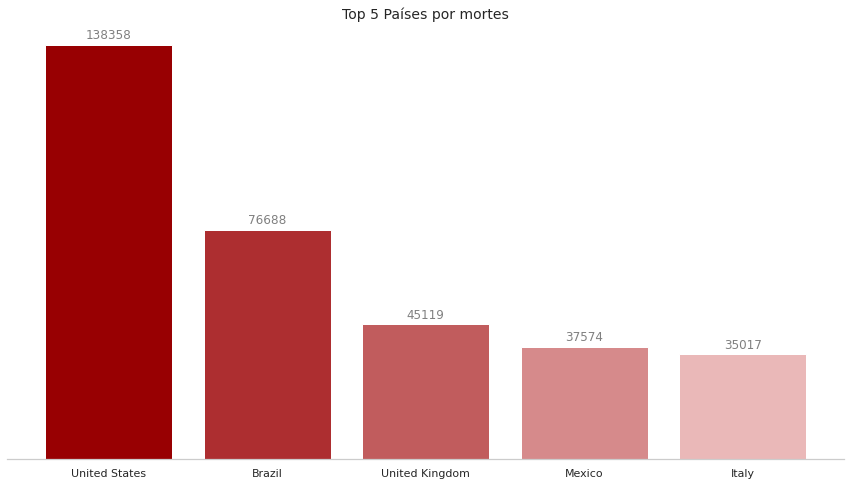

In [ ]:
# coletando dados para o gráfico de mortes
top_5_total_deaths = df.loc[df.date == df.date.max(), ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

# plotando gráfico de casos confirmados
fig, ax = plt.subplots(figsize=(15, 8))
rects = ax.bar('location', 'total_deaths', data=top_5_total_deaths, color= sns.light_palette('blood red', input="xkcd", reverse=True))

top5 = list(top_5_total_deaths.iloc[:5,1])
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True, direction='out')

for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='gray', fontsize=12)

sns.set_style('whitegrid')
sns.despine(left=True)
plt.grid(False)
plt.title('Top 5 Países por mortes', fontsize=14)
plt.show()


##Progressão da Covid no mundo
O aumento no número de casos faz com que os números de mortes relacionadas a doença também cresçam.

Vamos plotar um gráfico de linhas para acompanharmos a evolução dos números de mortes no mundo.

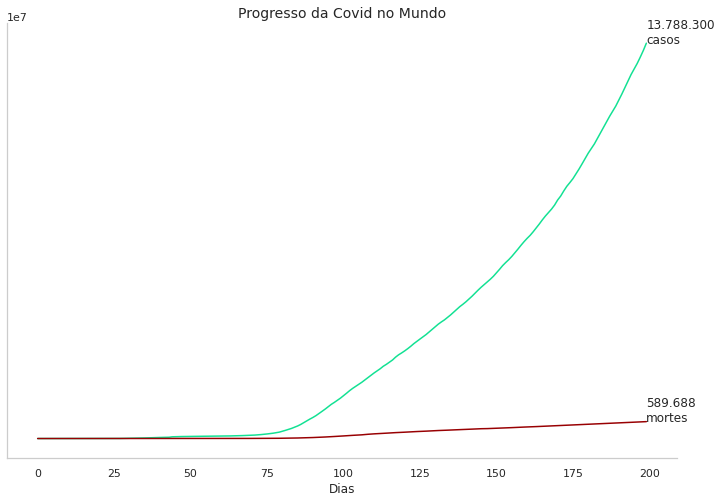

In [ ]:
# gráficos de casos ao longo do tempo
casos_mundo = df.loc[df.location == "World", "total_cases"].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True, direction='out')
ax.plot(casos_mundo, color='#12e193')
ax.text(x=casos_mundo.index.max(), y=casos_mundo.values.max(),s= f"13.788.300\ncasos",
        fontsize=12)
sns.set_style('whitegrid')
sns.despine()
plt.grid(False)


# gráficos de mortes ao longo do tempo
mortes_mundo = df.loc[df.location == "World", "total_deaths"].reset_index(drop=True)
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True, direction='out')
ax.plot(mortes_mundo, color='#980002')
ax.text(x=mortes_mundo.index.max(), y=mortes_mundo.values.max(),s= "589.688\nmortes",
        fontsize=12)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Dias')
plt.title('Progresso da Covid no Mundo', fontsize=14)
plt.grid(False)
plt.show()

In [ ]:
mortes_mundo.max() / casos_mundo.max() * 100

4.276727370306709

##Análise do Covid-19 no Brasil

Agora que temos uma visão geral da doença no mundo, vamos analisar a situação no território brasileiro.

In [ ]:
# criando um novo DataFrame com informações do Brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()

# verificando as 5 primeiras entradas
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3961,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3962,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3963,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3964,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3965,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Podemos ver que os resgistros de casos no mundo se iniciam ainda em **2019** no dia 31 de dezembro e se estendem até o dia em que está análise está sendo realizada 09 de julho de 2020.

In [ ]:
f'Primeiro registro: ({df_brasil.date.max()}), Registro Mais Recente: ({df_brasil.date.min()})'

'Primeiro registro: (2020-07-17 00:00:00), Registro Mais Recente: (2019-12-31 00:00:00)'

Com esses dados, podemos comparar o tempo que levou até o Brasil registrar o primeiro caso e a primeira morte.

In [ ]:
# primeiro caso no Brasil
caso1 = pd.to_numeric(df_brasil.loc[df_brasil['total_cases'] == 1].index)

# localizando primeiro caso no Brasil
df_brasil.loc[df_brasil['total_cases'] == 1].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4018,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
# tempo entre o primeiro caso no mundo e no Brasil
f' Passaram-se {(df_brasil.date.loc[4018] - df.date.min()).days} dias até o primeiro registro no Brasil.'

' Passaram-se 57 dias até o primeiro registro no Brasil.'

Após **57 dias** do primeiro registro mundial, tivemos o primeiro caso confirmado no Brasil.

In [ ]:
# primeira morte no Brasil
morte1 = pd.to_numeric(df_brasil.loc[df_brasil['total_deaths'] == 1].index)
# localizando primeira morte no Brasil
df_brasil.loc[df_brasil['total_deaths'] == 1].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4039,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
# tempo decorrido entre o primeiro caso e a primeira morte
f"Apenas {(df_brasil.date.loc[4039] -  df_brasil.date.loc[4018]).days} dias após o primeiro caso, registramos a primeira morte."

'Apenas 21 dias após o primeiro caso, registramos a primeira morte.'

##Evolução dos casos no Brasil

Vamos fazer um comparação dos casos e das morte no Brasil em relação a outros países.

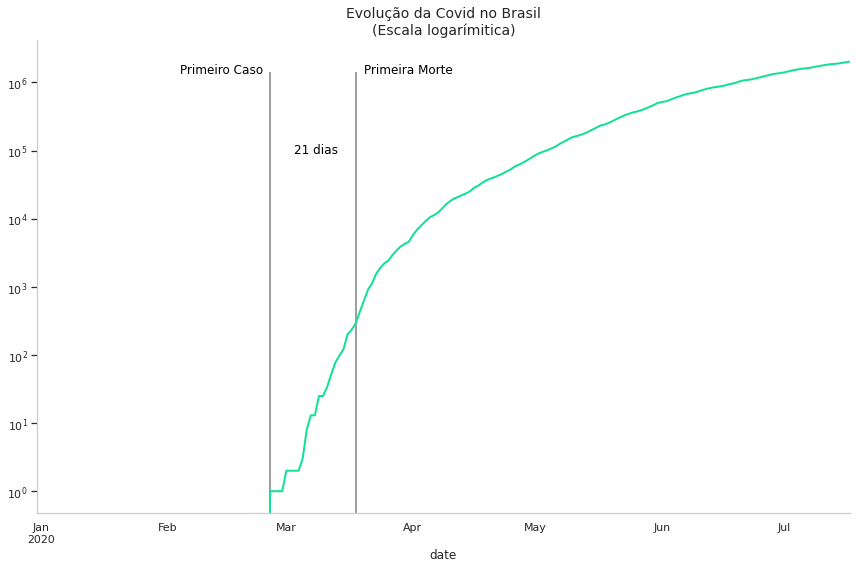

In [ ]:
# plotando gráfico para comparação]
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
font = {'family': 'arial',
        'color': 'black',
        'weight': 'normal',
        'size': 9}
df_brasil.plot('date', 'total_cases', ax=ax, logy=True, color='#12e193', linewidth=2, legend=False)
plt.grid(False)
plt.title("Evolução da Covid no Brasil\n(Escala logarímitica)", fontsize=14)
plt.vlines(x='2020-02-26', ymin=0, ymax=1400000, color='grey')
plt.vlines(x='2020-03-18', ymin=0, ymax=1400000, color='grey')
ax.tick_params(top=False, bottom=False, right=False, left=True, labelleft=True, labelbottom=True, direction='out')
plt.text(x='2020-02-04', y=1380000, s='Primeiro Caso', fontdict=font, fontsize=12)
plt.text(x='2020-03-03', y=90000, s='21 dias', fontdict=font, fontsize=12)
plt.text(x='2020-03-20', y=1380000, s='Primeira Morte', fontdict=font, fontsize=12)
plt.tight_layout()
sns.set_style('whitegrid')
sns.despine()
plt.show()

##Casos por milhão de habitante

É interessante analisarmos também o total de casos por milhão de habitantes. O Brasil támbem está no top 3 dessa lista.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


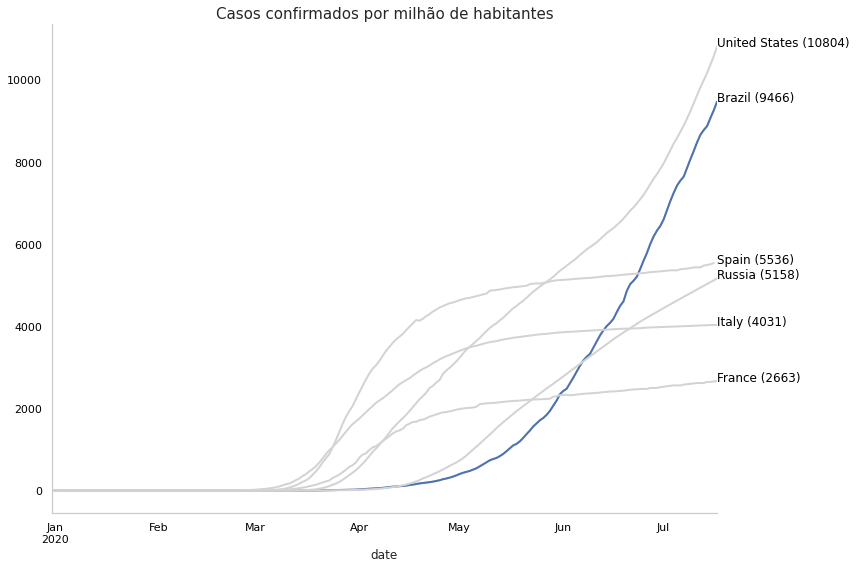

In [ ]:
# comparativo de casos por milhão de habitantes
def milhao(pais):
    font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 12}
    df.loc[df['location'] == pais].plot('date', 'total_cases_per_million', kind='line', ax=ax, linewidth=2, legend=False, color='lightgrey', grid=False)
    if pais == 'Brazil':
        df.loc[df['location'] == pais].plot('date', 'total_cases_per_million', kind='line', ax=ax, linewidth=2, legend=False,  grid=False)
    plt.text(x=df.date.max(), y=df.loc[df['location'] == pais, 'total_cases_per_million'].max(),
             s=f"{pais} ({int(df.loc[df['location'] == pais, 'total_cases_per_million'].max())})", fontdict=font)    
    plt.title("Casos confirmados por milhão de habitantes", fontsize=15)
    plt.xticks(color="black")
    plt.yticks(color="black")
    return

paises = ['Brazil', 'Italy', 'France', 'United States', 'Spain', 'Russia']
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('whitegrid')
sns.despine()
for x in paises:
    milhao(x)

plt.tight_layout()    
plt.show()

##Taxa de Letalidade

Taxa de letalidade (TL) ou coeficiente de letalidade é a proporção entre o número de mortes por uma doença e o número total de doentes que sofrem dessa doença, ao longo de um determinado período de tempo. É geralmente expressa em percentagem.

$$
\mathbf{L}
=
\frac{F}{E}
* 100
$$

* **L** - taxa de letalidade dos casos.
* **F** - Número de mortes por uma doença em um determinado período e área.
* **E** - Número de casos diagnosticados pela mesma doença no mesmo período e área.

Analisando essa taxa para os últimos 7 dias, ela está em **2.85%**. Visualmente temos>:


In [ ]:
round(df_brasil.loc[df_brasil['date'] >= '2020-07-08', 'new_deaths'].sum() / df_brasil.loc[df_brasil['date'] >= '2020-07-08', 'new_cases'].sum() * 100, 2)

2.88

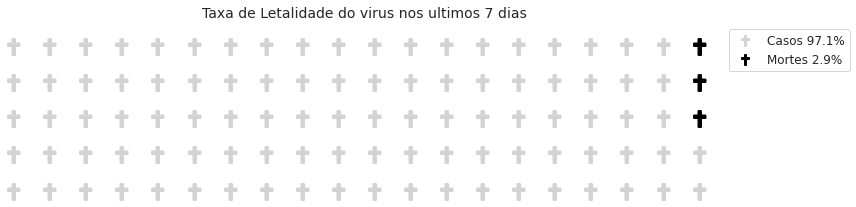

In [ ]:
# taxa de letalidade do virus dos ultimos 7 dias
taxa = {'casos' : df_brasil.loc[df_brasil['date'] >= '2020-07-08', 'new_cases'].sum(), 'mortes' : df_brasil.loc[df_brasil['date'] >= '2020-07-08', 'new_deaths'].sum()}

# importando biblioteca waffle
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle,
                rows=5,
                columns=20,
                colors=("lightgrey", "black"),
                values={'Casos' : 97.12, 'Mortes' : 2.88}, icons= 'cross', icon_size=18,
                legend={'labels' : ['Casos 97.1%', 'Mortes 2.9%'],
                    'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize' : 12},
                icon_legend=True, figsize=(12,8))
plt.title('Taxa de Letalidade do virus nos ultimos 7 dias', fontsize=14)
plt.show()


##Qual a Tendência?

Uma pergunta recorrente é, quando os números de casos e de mortes irão começar a cair. Vamos analisar quando esses picos foram atingidos e verificarmos se ainda estamos em uma tendência de alta ou de baixa.

###Casos

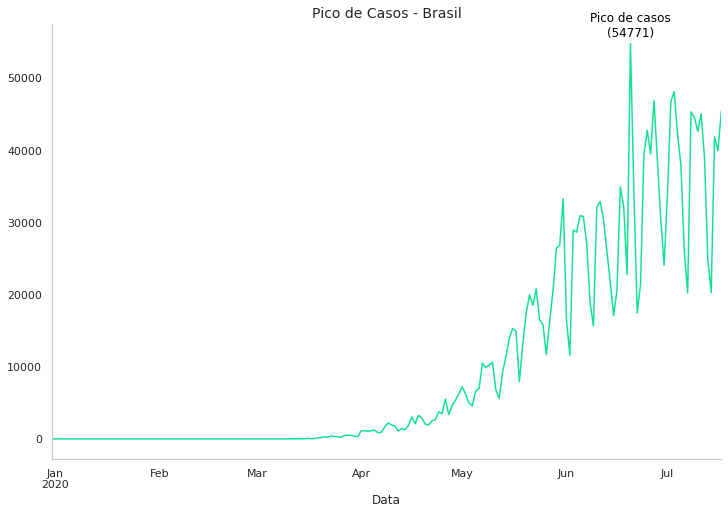

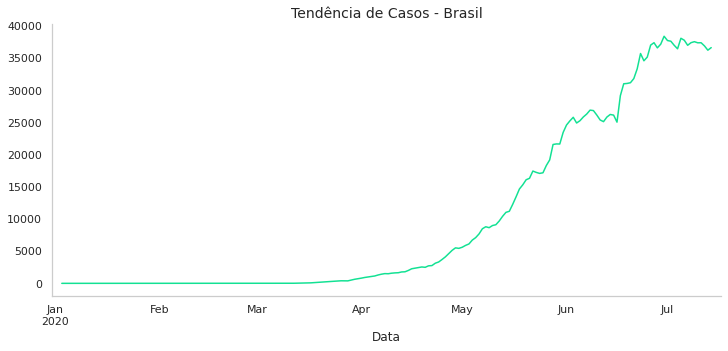

In [ ]:
# gráfico pico de mortes
fig, ax = plt.subplots(figsize=(12, 8))
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 12}
eixox = df.loc[df.location == 'Brazil', ['new_cases', 'date']].sort_values(by='new_cases',ascending=False).head(1)
df.loc[df['location']== 'Brazil'].plot('date', 'new_cases', kind='line', ax=ax, legend=False, grid=False, color='#12e193')
plt.text(x='2020-06-20', y=eixox.new_cases.max() + 1000, s=f'Pico de casos\n({int(eixox.new_cases.max())})', fontdict=font, horizontalalignment='center')
plt.xlabel('Data')
plt.title('Pico de Casos - Brasil', fontsize=14)
sns.despine()
sns.set_style('whitegrid')
plt.show()

# decompondo o gráfico para indentificar tendência
from statsmodels.tsa.seasonal import seasonal_decompose #importndo seasonal_decompose da biblioteca statsmodel
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 12}
dfbr = df.loc[df.location == 'Brazil', ['new_cases', 'date']]
dfbr.index = dfbr.date
dfbr.drop('date', axis=1, inplace=True)
result = seasonal_decompose(dfbr)
fig, ax = plt.subplots(figsize=(12, 5 ))
result.trend.plot(legend=False, ax=ax, grid=False, color='#12e193')
plt.xlabel('Data')
plt.title('Tendência de Casos - Brasil', fontsize=14)
sns.despine()
sns.set_style('whitegrid')
plt.show()

Dia **20 de junho** o país registrou impressionantes **54771** novos casos da doença.

## Pico de mortes
No dia **19 de maio** o Brasil atingiu a impressionante marca de **1.179** em 24h, segundo dados do Ministério de Saude. Calculando a média de mortes diárias a partir desta data, temos **995** mortes.

O gráfico a seguir, mostra o pico de mortes e a média de casos.


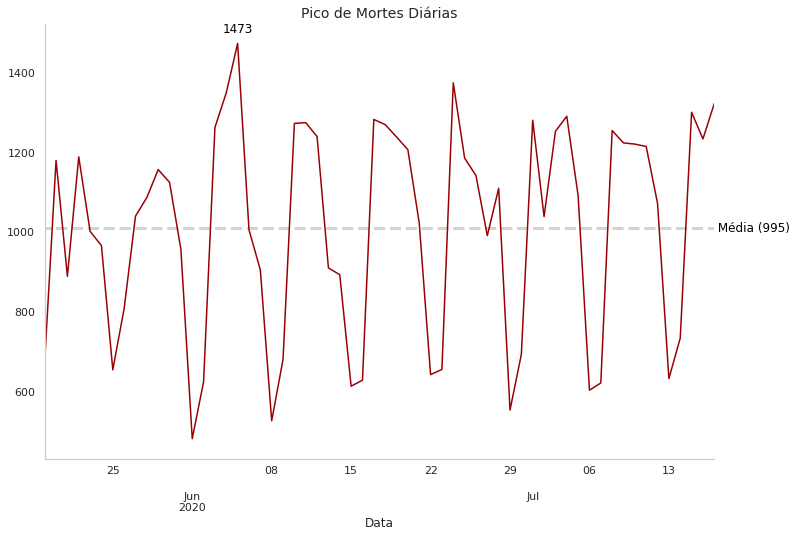

In [ ]:
# gráfico pico de mortes e média diária a partir de 1000 casos
fig, ax = plt.subplots(figsize=(12, 8))
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 12}
df_brasil.loc[df['date'] >= '2020-05-19'].plot('date', 'new_deaths', ax=ax, color='#980002', legend=False, grid=False)
plt.hlines(y=df_brasil.loc[df['date'] >= '2020-05-19', ['date', 'new_deaths']].mean(),
           xmin=0, xmax=df_brasil.date.max(), linestyles='dashed', linewidth=3, color='lightgrey')
plt.text(x= '2020-06-05', y=1500, s='1473', fontdict=font, horizontalalignment='center' )
plt.text(x= df_brasil.date.max(), y= df_brasil.loc[df['date'] >= '2020-05-19',['date', 'new_deaths']].mean(),
         s=' Média (995)', fontdict=font, verticalalignment='center')
plt.title('Pico de Mortes Diárias', fontsize=14)
plt.xlabel('Data')
sns.despine()



Os registros de casos no Brasil sofrem oscilações nos fins de semana, isso se dá por conta da falta de efetivo, já que nos fins de semana diminui-se bastante a quantidade de pessoas trabalhando. E isso fica claro gráfico onde há intervalos abaixo da média.

In [ ]:
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3961,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3962,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3963,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3964,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3965,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
df_brasil.loc[df['new_deaths'] >= 1000, 'new_deaths'].mean()

1201.6944444444443

No dia **04 de Junho**  O Brasil atingiu a impressionante marca de **1473** mortes por Covid-19.

Após o pico de casos os números, apesar de exorbitantes, parecem estar se estabilizando. Há expectitava de que os números voltem a subir, pois muitos estados estão em processo de reaberuta do comércio mesmo com os números tão altos. E essa preocupação faz sentido, pois os Estados Unidos começaram a reabertua com números muitos altos e poucas semanas depois os números de casos diários voltaram crescer.

Vamos plotar um gráfico para melhor entendimento desta situação.

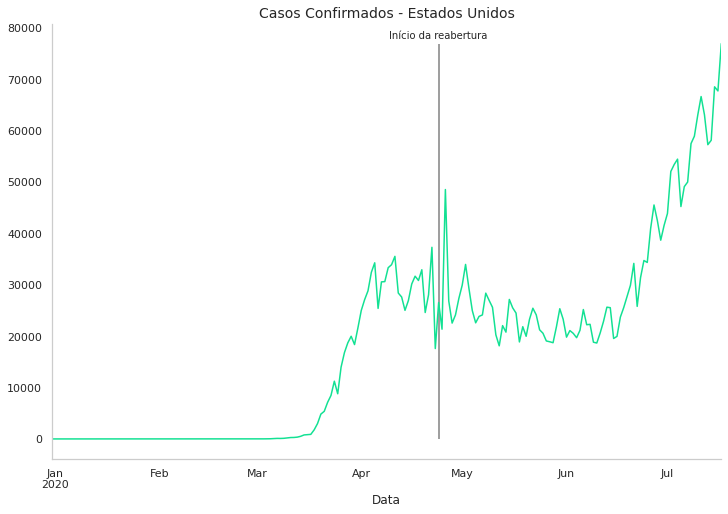

In [ ]:
# grafico de casos dos Estados Unidos
fig, ax = plt.subplots(figsize=(12,8))
df.loc[df['location'] == 'United States'].plot('date', 'new_cases', ax=ax, legend=False, grid=False, color='#12e193')
sns.despine()
plt.title('Casos Confirmados - Estados Unidos', fontsize=14)
plt.text(x='2020-04-24', y=df.loc[df['location'] == 'United States', 'new_cases'].max() + 1000, s='Início da reabertura', horizontalalignment='center')
plt.vlines(x='2020-04-24', ymin= 0, ymax=df.loc[df['location'] == 'United States', 'new_cases'].max(), color='gray')
plt.xlabel('Data')
sns.set_style('whitegrid')
plt.show()

Como visto no gráfico acima, algums semanas após o processo de reabertura, os casos diários de covid disparam e atingiram **66.625 casos** no dia 14 de Julho.

Vamos comparar a curva do Brasil com as de outros paíse.

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
